<a href="https://colab.research.google.com/github/Ndy-S/machine-learning-fundamental/blob/main/Convolutional%20Neural%20Networks%20in%20TensorFlow/W3_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning

## Understanding Transfer Learning the Concepts

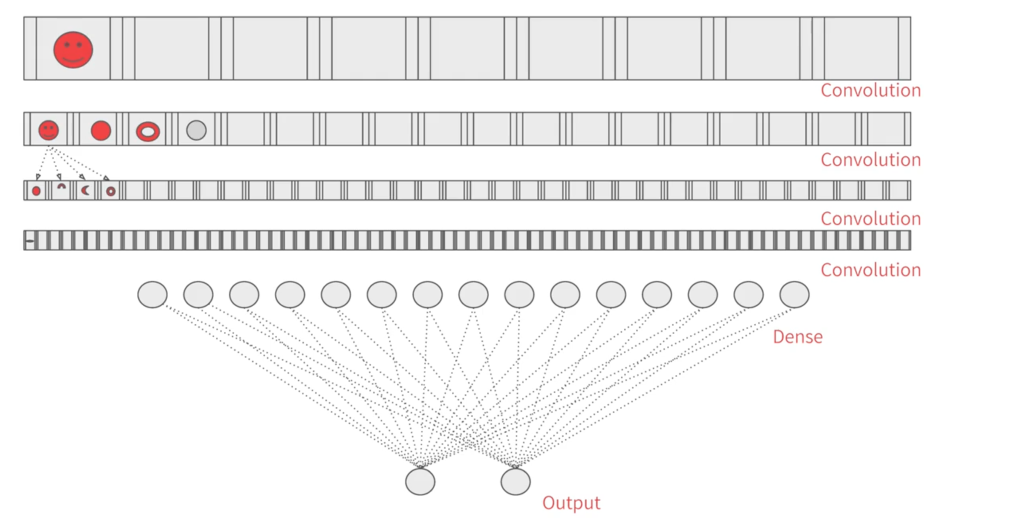

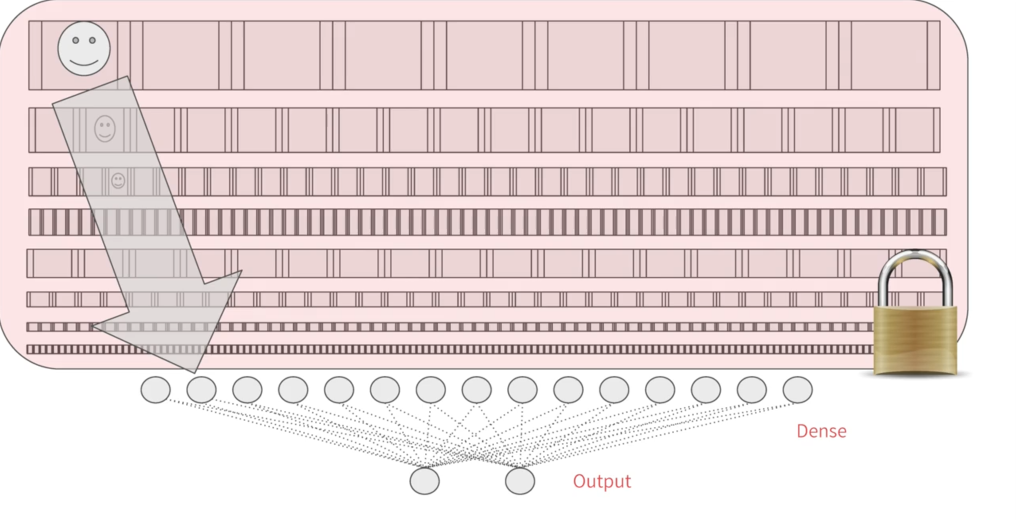

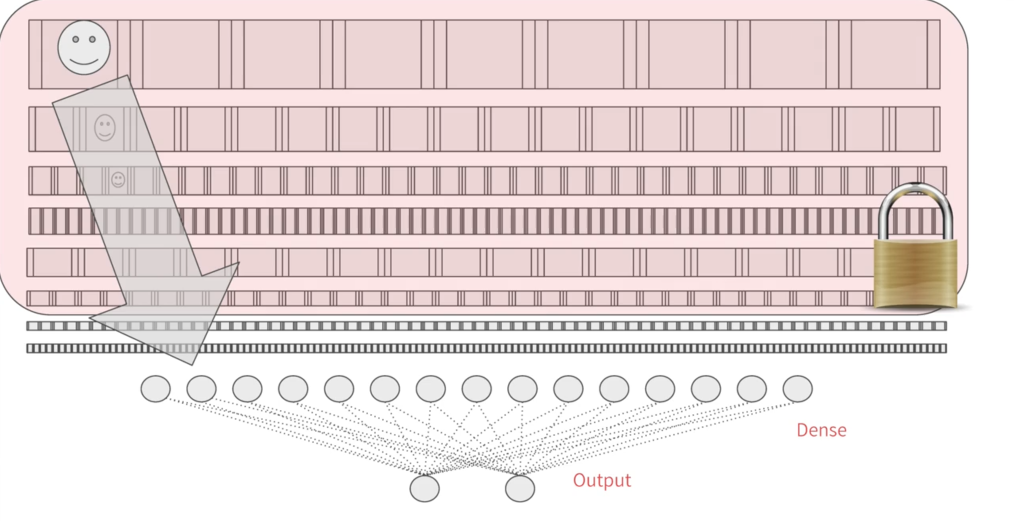

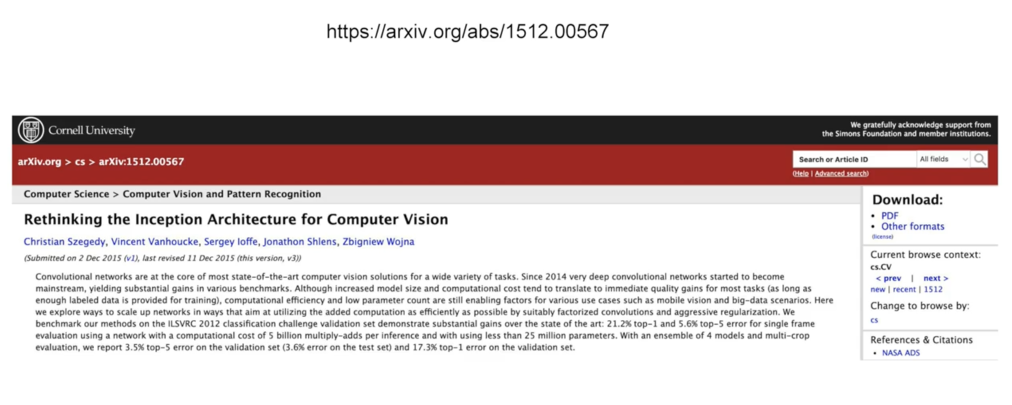

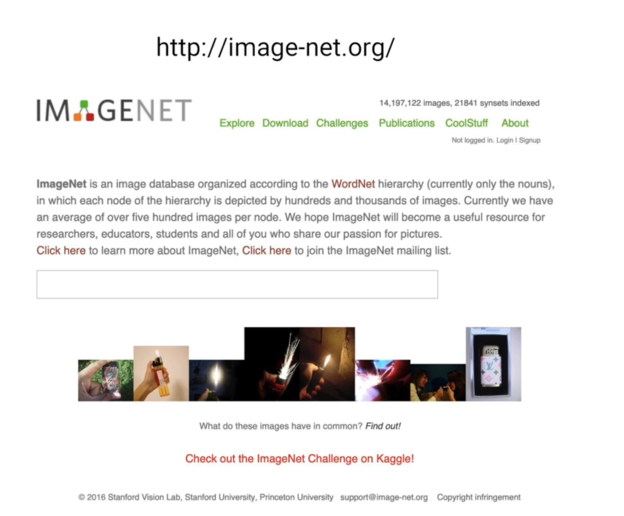

In [1]:
# SECTION DIVIDER

## Coding Transfer Learning from the Inception Model

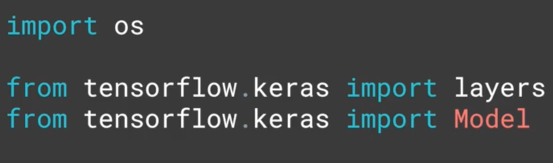

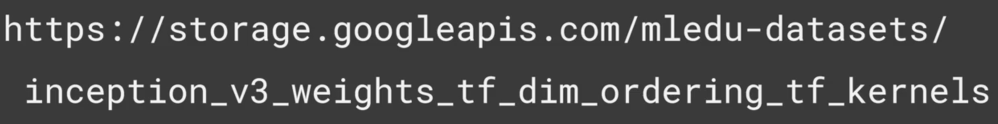

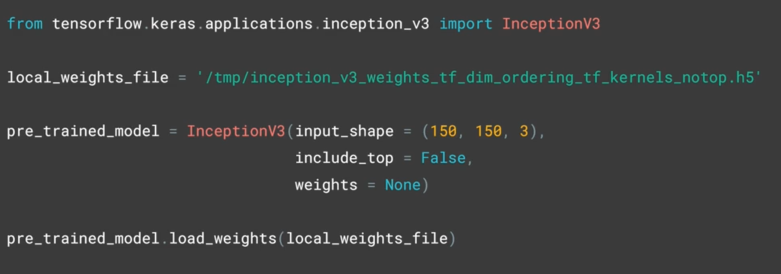

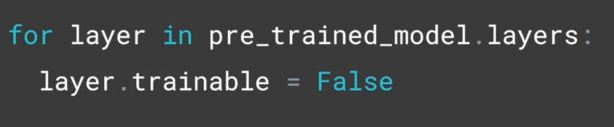

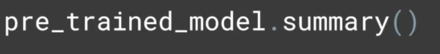

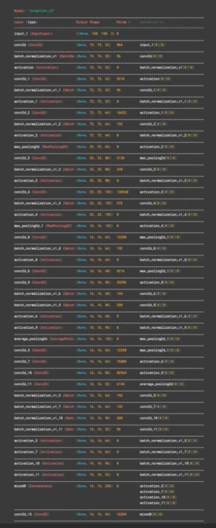

In [2]:
# SECTION DIVIDER

## Coding Your Own Model with Transfer Learning

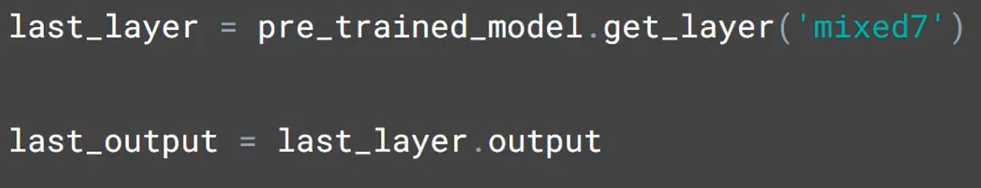

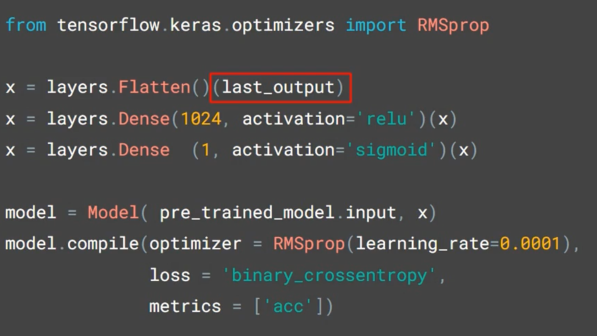

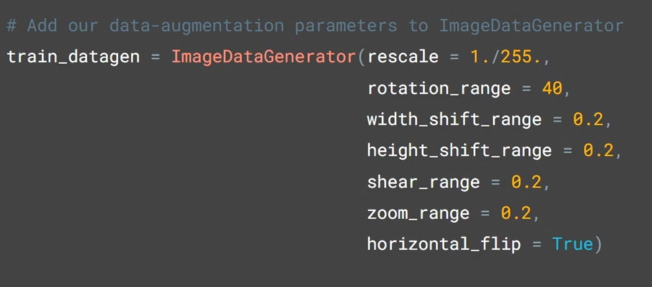

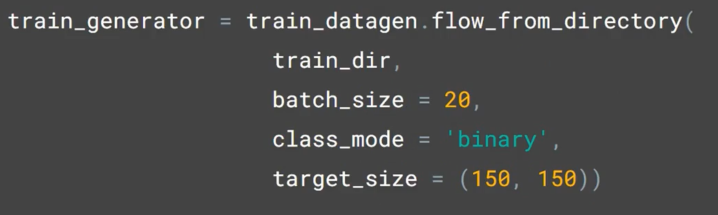

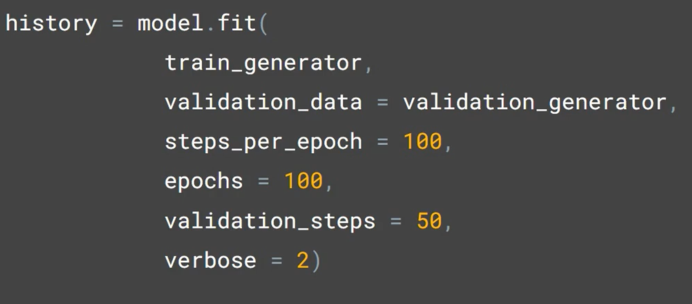

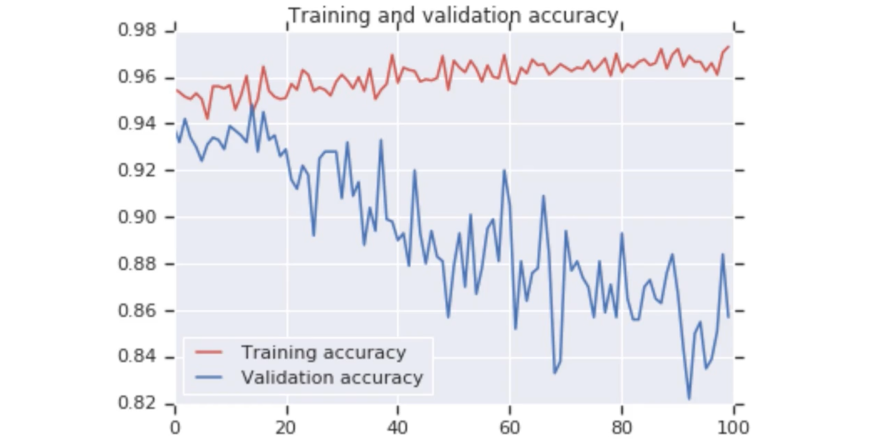

In [3]:
# SECTION DIVIDER

## Exploring Dropouts

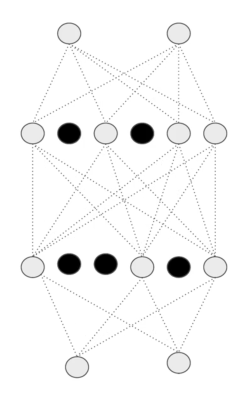

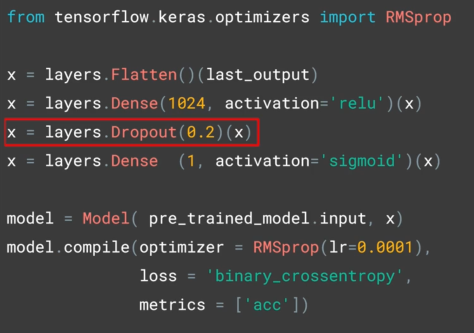

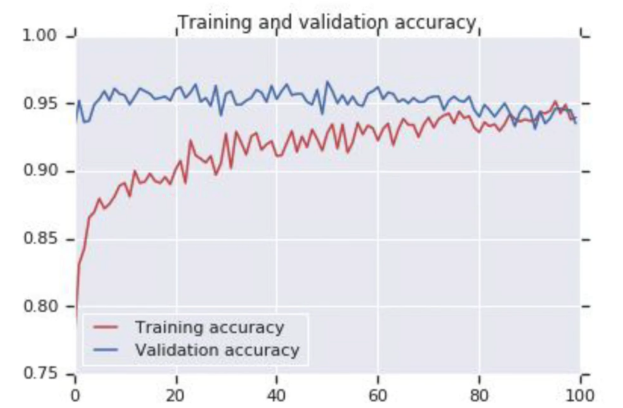

In [4]:
# SECTION DIVIDER

## Transfer Learning Code

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-09-14 12:49:27--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.207, 74.125.126.207, 74.125.70.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   196MB/s    in 0.4s    

2023-09-14 12:49:28 (196 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [7]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [8]:
# Choose `mixed7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [9]:
# Add dense layers for you classifier
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense  (1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

In [10]:
# Set the training parameters
model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [11]:
# Prepare the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-09-14 12:49:39--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.207, 74.125.126.207, 74.125.70.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   165MB/s    in 0.4s    

2023-09-14 12:49:40 (165 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [12]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 39s - loss: 0.3710 - accuracy: 0.8525 - val_loss: 0.1574 - val_accuracy: 0.9330 - 39s/epoch - 387ms/step
Epoch 2/20
100/100 - 16s - loss: 0.2087 - accuracy: 0.9185 - val_loss: 0.0912 - val_accuracy: 0.9650 - 16s/epoch - 161ms/step
Epoch 3/20
100/100 - 15s - loss: 0.1890 - accuracy: 0.9270 - val_loss: 0.1110 - val_accuracy: 0.9560 - 15s/epoch - 149ms/step
Epoch 4/20
100/100 - 15s - loss: 0.1869 - accuracy: 0.9255 - val_loss: 0.0972 - val_accuracy: 0.9620 - 15s/epoch - 150ms/step
Epoch 5/20
100/100 - 15s - loss: 0.1639 - accuracy: 0.9345 - val_loss: 0.0865 - val_accuracy: 0.9680 - 15s/epoch - 152ms/step
Epoch 6/20
100/100 - 16s - loss: 0.1431 - accuracy: 0.9495 - val_loss: 0.0970 - val_accuracy: 0.9650 - 16s/epoch - 158ms/step
Epoch 7/20
100/100 - 15s - loss: 0.1580 - accuracy: 0.9430 - val_loss: 0.0874 - val_accuracy: 0.9690 - 15s/epoch - 151ms/step
Epoch 8/20
100/100 - 16s - loss: 0.1337 - accuracy: 0.9445 - val_loss: 0.0872 - val_accuracy: 0.9670 - 16s/epoch - 159

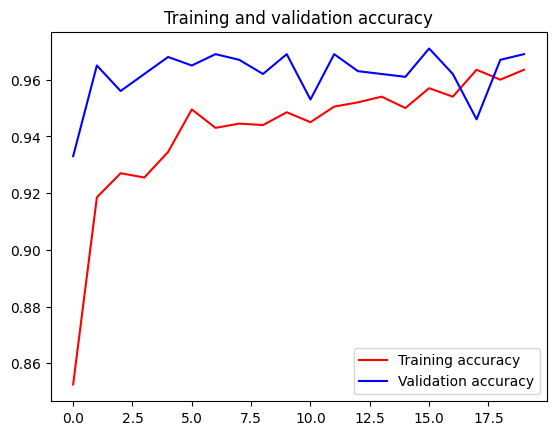

<Figure size 640x480 with 0 Axes>

In [14]:
# Evaluate the results
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [15]:
# SECTION DIVIDER

## Transfer Learning Horses vs Humans